# Compare shock profiles with an exponential

Loops over the profiles provided in a list, orients the profiles along the principal axes from the momentum of inertia tensor, fits a model to the shocks, and records the information.

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from array_io import *
from read_trajectory import *
from sorting_routines import *
import scipy.interpolate as si

In [2]:
#load in the file containing a list of trajectories from which profiles have been generated

fname = "trajectory_list.753.gp.txt"
flist = read_string_array_nlines(fname)

In [3]:
#define the suffix for the PPM and GPI profile interpolations

fsuff_ppm = ".blended.ppm.profile"       #PPM interpolation
fsuff_gpi = ".blended.gp.log.profile"    #GPI interpolation
fsuff_model = ".blended.exponential.profile"   #model profile
fsuff_model_info = ".blended.exponential.profile.info"   #model profile information

## Read in the exponential fits and plot them

h_fit =  0.00138
h_fit =  0.001387
h_fit =  0.002286
h_fit =  0.001673
h_fit =  0.001343
h_fit =  0.004239
h_fit =  0.001998
h_fit =  0.001475
h_fit =  0.00397
h_fit =  0.001433
h_fit =  0.001841
h_fit =  0.000922
h_fit =  0.001162
h_fit =  0.000946
h_fit =  0.001102
h_fit =  0.001311
h_fit =  0.001944
h_fit =  0.001373
h_fit =  0.001604
h_fit =  0.001534
h_fit =  0.001555
h_fit =  0.002979
h_fit =  0.002117
h_fit =  0.001907
h_fit =  0.002312
h_fit =  0.001583
h_fit =  0.002363
h_fit =  0.000954
h_fit =  0.001143
h_fit =  0.001404
h_fit =  0.00232
h_fit =  0.003156
h_fit =  0.010057
h_fit =  0.002244
h_fit =  0.010774
h_fit =  0.00122
h_fit =  0.00152
h_fit =  0.001472
h_fit =  0.001868
h_fit =  0.002089
h_fit =  0.004036
h_fit =  0.002262
h_fit =  0.001582
h_fit =  0.00325
h_fit =  0.002845
h_fit =  0.001834
h_fit =  0.002123
h_fit =  0.001637
h_fit =  0.001639
h_fit =  0.002981
h_fit =  0.00091
h_fit =  0.001679
h_fit =  0.002501
h_fit =  0.001874
h_fit =  0.001983
h_fit =  0.002453

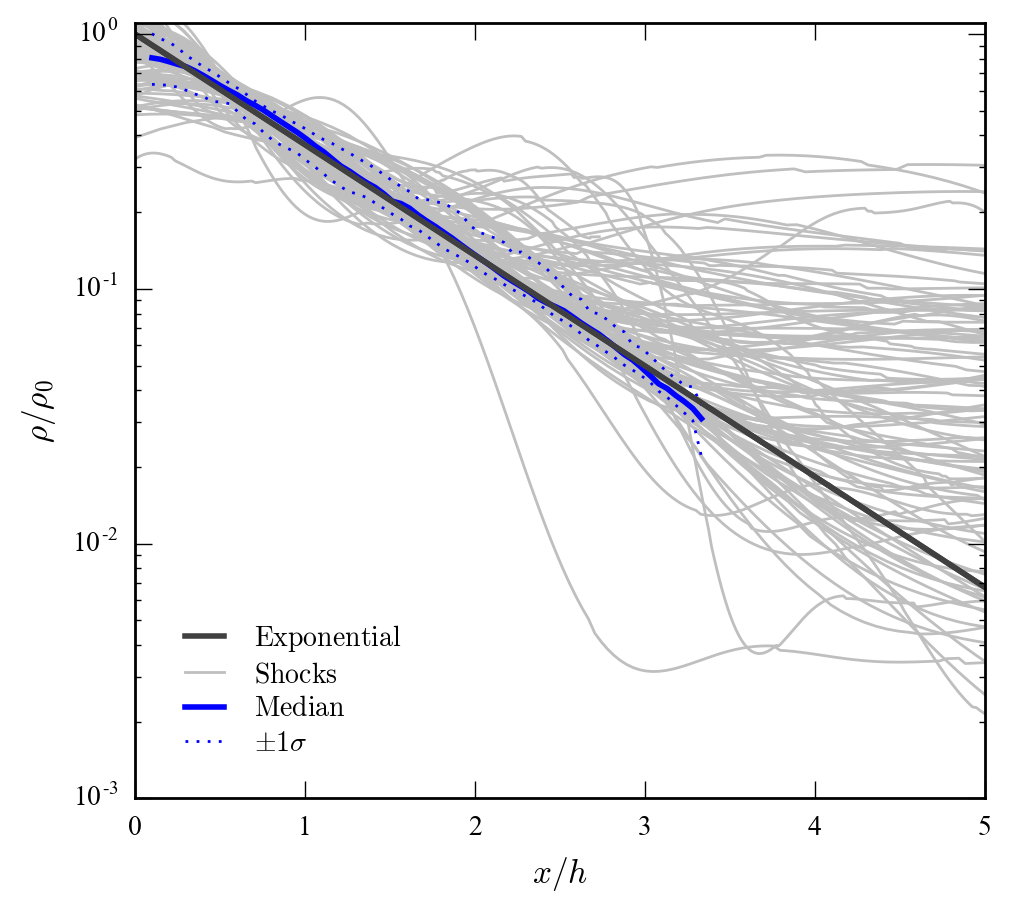

In [91]:
#loop over trajectories and plot all the profiles
nmin = 0
nmax = 100

k = 0

#distribution

n_dist = 100
x_dist = 5.0*np.arange(n_dist)/float(n_dist-1) + 0.1
y_dist = np.zeros((n_dist,nmax-nmin+1))
y_dist_med = np.zeros(n_dist)
y_dist_minus = np.zeros(n_dist)
y_dist_plus  = np.zeros(n_dist)


#begin loop over trajectories
for i in range(nmin,nmax+1,1):
    
    #define the file name for the PPM and GPI profiles
    fname_profile_ppm   = flist[i]+fsuff_ppm
    fname_profile_gpi   = flist[i]+fsuff_gpi
    fname_profile_model = flist[i]+fsuff_model
    fname_profile_minfo = flist[i]+fsuff_model_info



    
    #shock_number = flist[i].lstrip('trajectories.gp/trajectory.single.').rstrip('.txt')
    shock_number = flist[i][39:47]
    
    #read in the trajectory information
    xcp,ycp,zcp,xdp,ydp,zdp,ddp,vxdp,vydp,vzdp,axtp,aytp,aztp,bxtp,bytp,bztp,cxtp,cytp,cztp,xminp,xmaxp = read_trajectory(flist[i])
    
    
    #read in the PPM profile
    t_ppm, x_ppm, y_ppm, z_ppm, d_ppm, vx_ppm, vy_ppm, vz_ppm = read_eight_arrays(fname_profile_ppm)
    
    #read in the GPI profile
    t_gpi, x_gpi, y_gpi, z_gpi, d_gpi, vx_gpi, vy_gpi, vz_gpi = read_eight_arrays(fname_profile_gpi)
    
    
    #rotate velocities
    vx_ppm_rot = axtp*vx_ppm + bxtp*vy_ppm + cxtp*vz_ppm
    vy_ppm_rot = aytp*vx_ppm + bytp*vy_ppm + cytp*vz_ppm
    vz_ppm_rot = aztp*vx_ppm + bztp*vy_ppm + cztp*vz_ppm
    vx_gpi_rot = axtp*vx_gpi + bxtp*vy_gpi + cxtp*vz_gpi
    vy_gpi_rot = aytp*vx_gpi + bytp*vy_gpi + cytp*vz_gpi
    vz_gpi_rot = aztp*vx_gpi + bztp*vy_gpi + cztp*vz_gpi
    
    
    t_exponential, d_exponential, v_exponential =  read_three_arrays(fname_profile_model)



    #plot the profile density interpolation
    #lw = 2
    #tfont = "Times New Roman"
    #plt.plot(t_ppm, d_ppm, color="0.75", linewidth=lw)
    #plt.plot(t_gpi, d_gpi, color="blue", linewidth=lw)
    #plt.plot(t_exponential, d_exponential, color="purple",linewidth=lw)
    #plt.xlim([-0.04,0.04])
    #plt.ylim([1.0e-2,500])
    #plt.yscale('log')
    #plt.xticks(fontname=tfont)
    #plt.yticks(fontname=tfont)
    #plt.xlabel(r"$x/L$")
    #plt.ylabel(r"$\rho/\bar{\rho}$")
    #plt.text(-0.035,100,shock_number,fontname=tfont)
    #plt.show()
    
    #out = write_three_arrays(fname_profile_model,t_model,d_model,v_model)

    fp = open(fname_profile_minfo,"r")
    fl = fp.readlines()
    fp.close()
    h_fit = float(fl[7])
    print "h_fit = ",h_fit
    
    #plot the profile density interpolation
    lw = 2
    tfont = "Times New Roman"
    
    #put everything on the same scale
    t_i = t_ppm
    d_ppm_i = d_ppm
    d_gpi_i = np.interp(t_i,t_gpi,d_gpi)
    d_exp_i = np.interp(t_i,t_exponential,d_exponential)
    
    x = t_i/h_fit
    y = np.exp(-1.0*x)

    if(k==0):
        plt.plot(x,y,color="0.25",linewidth=lw,label=r"$\mathrm{Exponential}$")


    
    fi = np.where( (t_i/h_fit <0) & (t_i/h_fit>-1) )[0]
    if(d_exp_i[fi[0]]>d_exp_i.max()*np.exp(-2)):
        t_i *= -1.0

    #plt.plot(t_i/h_fit,d_exp_i/d_exp_i.max(), color="0.5", linewidth=lw)
    #plt.plot(t_i/h_fit,d_ppm_i/d_exp_i.max(), color="0.75", linewidth=lw)

    #plt.plot(t_i/h_fit,d_gpi_i/d_exp_i.max(), color="0.75", linewidth=lw)


    #re fit exponential
    fi = np.where( (t_i/h_fit < 2.0)&(t_i/h_fit>=0))[0]
    
    x_fit = t_i[fi]
    y_fit = np.log(d_gpi_i[fi])
    pfit = np.polyfit(x_fit,y_fit,1)
    h_exp = -1./pfit[0]
    d_exp_max = np.exp(pfit[1])
    #print (h_exp,d_exp_max,d_gpi.max(),t_i.max())


    lw =1
    
    if(k==0):
        plt.plot(t_i/h_exp,d_gpi_i/d_exp_max, color="0.75", linewidth=lw,zorder=0,label=r"$\mathrm{Shocks}$")
    else:
        plt.plot(t_i/h_exp,d_gpi_i/d_exp_max, color="0.75", linewidth=lw,zorder=0)


    #plt.plot(t_i/h_exp,d_gpi_i/d_gpi.max() / d_exp_max,  linewidth=lw,zorder=0)

    d_interp = si.interp1d(t_i[fi]/h_exp,d_gpi_i[fi]/d_exp_max)
    for j in range(n_dist):
        #y_dist[j,k] = np.interp(x_dist[j],t_i/h_exp,d_gpi_i)
        if( (x_dist[j]>t_i[fi[0]]/h_exp)&(x_dist[j]<t_i[fi[len(fi)-1]]/h_exp) ) :
            y_dist[j,k] = d_interp(x_dist[j])
        #print y_dist[j,k], x_dist[j], t_i[fi[0]]/h_exp, t_i[fi[1]]/h_exp
    
    k+=1


    
    
plt.plot(x,y,color="0.25",linewidth=2,zorder=1)

for j in range(n_dist):
    
    fi = np.where(y_dist[j,:]>0)[0]
    
    if(len(fi)>10):
        y_dist_med[j] = np.median(y_dist[j,fi])
    
    xi = sorted_index(y_dist[j,fi[:]])
    #print len(xi)
    
    if len(xi)>10:
        y_dist_minus[j] = y_dist[j,fi[xi[int(0.16*len(xi))]]]
        y_dist_plus[j] = y_dist[j,fi[xi[int(0.84*len(xi))]]]

lw = 2
fi = np.where(y_dist_med>0)[0]
plt.plot(x_dist[fi],y_dist_med[fi],color="blue",linewidth=lw,zorder=1,label=r"$\mathrm{Median}$")
fi = np.where(y_dist_minus>0)[0]
plt.plot(x_dist[fi],y_dist_minus[fi],color="blue",linestyle=":",linewidth=1,zorder=1,label=r"$\pm 1\sigma$")
fi = np.where(y_dist_plus>0)[0]
plt.plot(x_dist[fi],y_dist_plus[fi],color="blue",linestyle=":",linewidth=1,zorder=1)


plt.axes().set_aspect(1.3)

plt.xlim([0,5])
plt.ylim([1.0e-3,1.1])
plt.yscale('log')
plt.xticks(fontname=tfont)
plt.yticks(fontname=tfont)
plt.xlabel(r"$x/h$")
plt.ylabel(r"$\rho/\rho_0$")
plt.legend(loc=3,fontsize=10,frameon=False)
plt.gcf().set_size_inches(5.,5.)
#plt.show()


plt.savefig(filename="exponential_profiles.png",bbox_inches="tight")





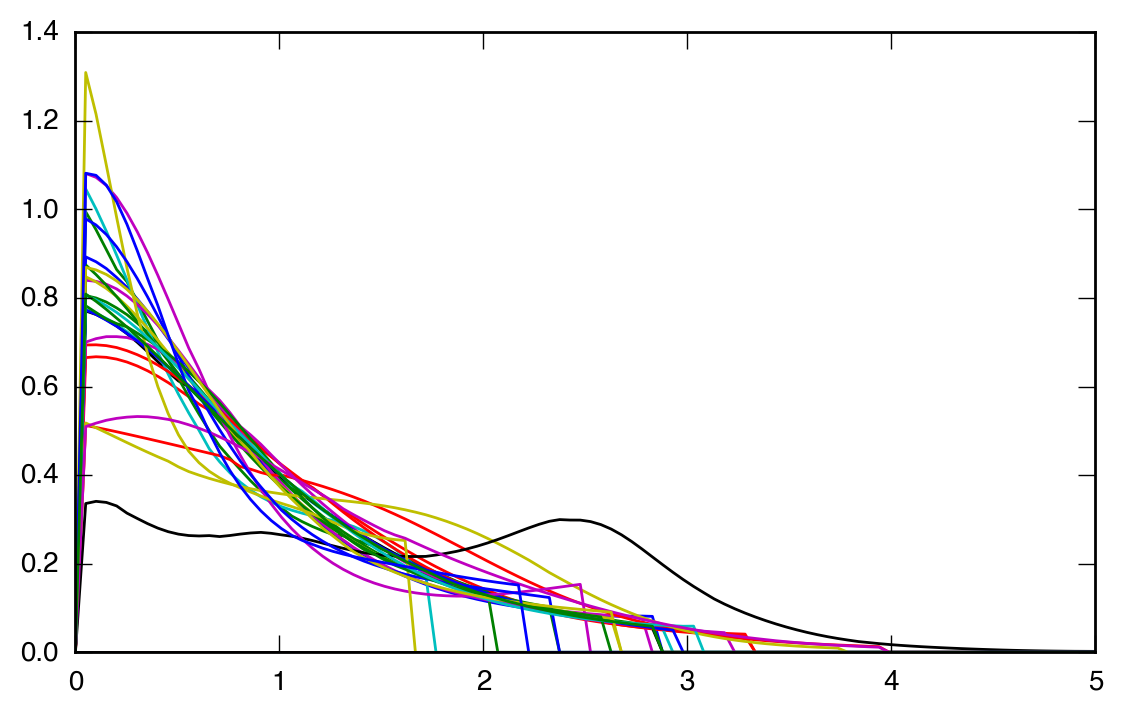

In [73]:
for j in range(nmax-nmin+1):
    plt.plot(x_dist,y_dist[:,j])
    #print y_dist[:,j]

In [63]:
print len(t_i)

1001
